In [ ]:
# A brief of dataset

In [ ]:
'''
This is a list of over 34,000 consumer reviews for Amazon products like the Kindle, Fire TV Stick, and more provided by 
Datafiniti's Product Database. The dataset includes basic product information, rating, review text, and more for each product.
Dataset can be downloaded from https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products#1429_1.csv.
'''

In [ ]:
# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob
##import re, string, unicodedata
import nltk
##import contractions
##import inflect
 ## from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
# Importing dataset

In [2]:
amz_reviews=pd.read_csv("C://Users//acer//Desktop//1sem//python//consumer-reviews-of-amazon-products//1429_1.csv")

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Looking at first few rows

In [3]:
amz_reviews.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [ ]:
# Looking at last few rows

In [5]:
amz_reviews.tail(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-31T00:00:00Z,NaN,2015-09-01T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,NaN,NaN,Just the Buyer
34659,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-12-23T00:00:00Z,NaN,2015-11-01T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,NaN,NaN,sandi


In [ ]:
# listing all column names

In [6]:
amz_reviews.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [ ]:
# shape of dataset

In [7]:
amz_reviews.shape

(34660, 21)

In [ ]:
# Dropping unncessary columns

In [8]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs']

In [10]:
df=pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))

In [ ]:
# shape of new dataset

In [11]:
df.shape

(34660, 6)

In [ ]:
# visualization of brand 

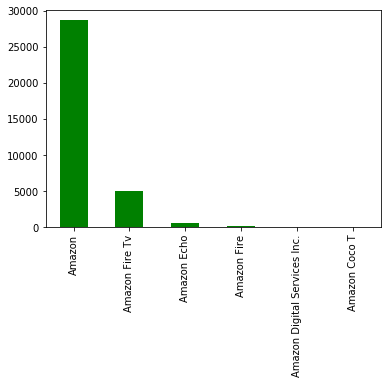

In [23]:
df.brand.value_counts().plot(kind = "bar",color='g')

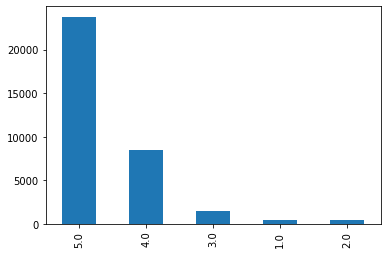

In [24]:
df['reviews.rating'].value_counts().plot(kind='bar')

In [ ]:
# creating a new col counting no of len of review

In [25]:
df['nchar'] = df['reviews.text'].str.len()

In [26]:
df.head(2)

,brand,categories,reviews.rating,reviews.text,reviews.title,reviews.username,nchar
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,This product so far has not disappointed. My c...,Kindle,Adapter,143.0
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great for beginner or experienced person. Boug...,very fast,truman,75.0


In [27]:
df['nchar'].describe()

count    34659.000000
mean       159.047434
std        185.837884
min          3.000000
25%         70.000000
50%        106.000000
75%        183.000000
max      10670.000000
Name: nchar, dtype: float64

In [ ]:
# checking for null data

In [28]:
df.isnull().sum()

brand                0
categories           0
reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
nchar                1
dtype: int64

In [ ]:
# dropping all rows containing nulll values

In [29]:
df = df.dropna(inplace=False)

In [ ]:
# changing the data type of reviews col

In [30]:
df['reviews.text'] = df['reviews.text'].astype(str)

In [ ]:
# Lower case all reviews

In [31]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
## remove punctuation

In [32]:
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')

In [ ]:
## remove stopwords

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
# most repetitive words

In [34]:
most = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
most

great     11719
tablet     8957
use        7582
love       6573
easy       6127
amazon     5657
kindle     5221
bought     5044
good       4993
one        4928
dtype: int64

In [35]:
most = list(most.index)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in most))

In [36]:
most2 = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[:10]
most2

fire       4775
price      4130
like       3796
product    3523
tv         3211
would      3176
works      3089
get        2978
echo       2862
much       2763
dtype: int64

In [37]:
from textblob import TextBlob

In [38]:
TextBlob(df['reviews.text'][1]).words

WordList(['beginner', 'experienced', 'person', 'gift', 'loves'])

In [40]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
#make wordcoud

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

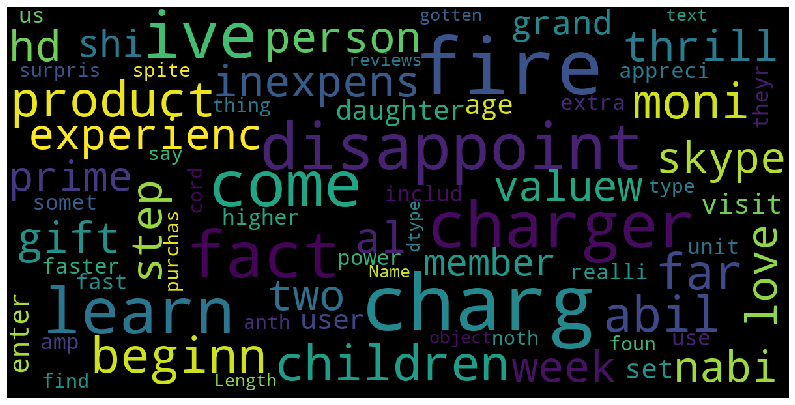

In [42]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['reviews.text'])

In [44]:
statement = "expensive tablet"
sentiment1 = TextBlob(statement).sentiment
sentiment1

Sentiment(polarity=-0.5, subjectivity=0.7)

In [45]:
def senti(x):
    return TextBlob(x).sentiment

In [46]:
df['senti_score'] = df['reviews.text'].apply(senti)

In [47]:
df.senti_score.head()

0                                   (0.1, 1.0)
1                                   (0.5, 0.6)
2                                   (0.0, 0.0)
3    (0.18124999999999997, 0.6489583333333333)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

In [48]:
df.shape

(34620, 8)

In [ ]:
# Thank you